### supervised learning

In [7]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 682.7 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.1 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.1 MB 1.9 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.1 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.1 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.1 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.1 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.1 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.1 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.1 MB 2.2 MB/s eta 0:00:05
   --- -------------------


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 2.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.8 MB 2.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.8 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 2.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 2.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 2.9 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 2.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/1.8 MB 3.0 MB/s eta 0:00:01
   ------------------------- ----

In [5]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

linear regression

In [9]:
# linear regresion

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
# data sederhana

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # reshape untuk mengubah dimensi array
y = np.array([50, 55, 65, 70, 75])

In [11]:
# but model dan latih
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [13]:
# cetak koefisien dan intercept (m) dan (b)

print("Koefisien (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Koefisien (m): 6.500000000000001
Intercept (b): 43.5


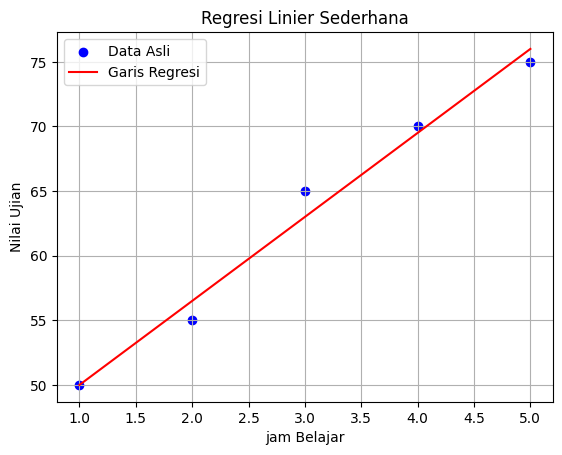

In [14]:
# prediksi dan visualisasi

plt.scatter(x, y, color='blue', label='Data Asli')
plt.plot(x, model.predict(x), color='red', label='Garis Regresi')
plt.xlabel('jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Regresi Linier Sederhana')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# prediksi untuk jam belajar 6 jam
x = 6
model.predict([[x]])

# atau bisa pakai
# x = np.array([6]).reshape(-1, 1)
# pred = model.predict(x)
# pred

array([82.5])

### case : menggunakan dataset publik (california housing dataset)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline   

In [26]:
# load dataset 
rumah = fetch_california_housing()
x = rumah.data
y = rumah.target
rumah

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [28]:
# membuat dataframe
coulum_names = rumah.feature_names
df = pd.DataFrame(data=x, columns=coulum_names)
df["Price"] = y

eksplorasi data

In [29]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
# ukuran data
df.shape

(20640, 9)

In [31]:
# 5 baris pertama
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [33]:
# cek missing value
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [34]:
# melihat deskripsi data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


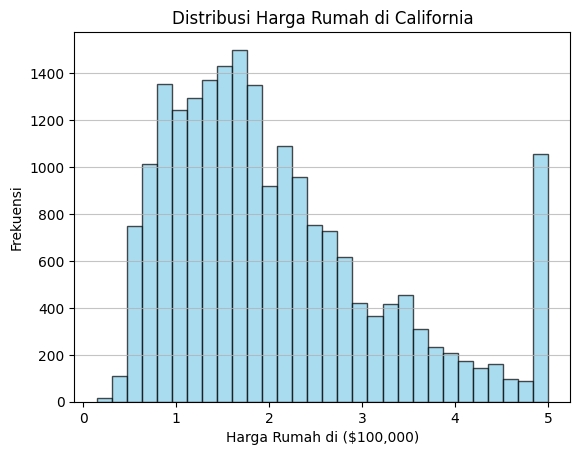

In [35]:
# visualisasi distribusi harga rumah
plt.hist(df["Price"], bins=30, color='skyblue', edgecolor = 'black', alpha=0.7)
plt.xlabel("Harga Rumah di ($100,000)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Rumah di California")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [38]:
# seleksi fitur dan target
selector = SelectKBest(f_regression, k=5)
x_selected = selector.fit(x, y)
x_selected

SelectKBest(k=5, score_func=<function f_regression at 0x0000021FF2B9BC40>)

In [ ]:
# split / bagi data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
# standarize data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [45]:
# build model dan train
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [46]:
# Membuat prediksi
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

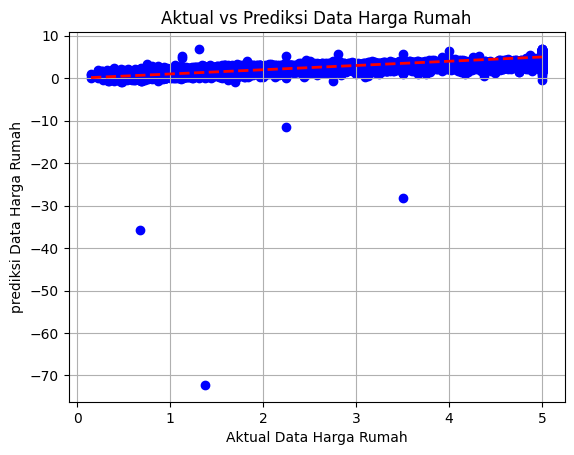

In [50]:
# visualisasi hasil prediksi
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel("Aktual Data Harga Rumah")
plt.ylabel("prediksi Data Harga Rumah")
plt.title("Aktual vs Prediksi Data Harga Rumah")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.grid()
plt.show()

In [53]:
# evaluasi model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)
# menghitung MAE
mae = np.mean(np.abs(y_test - y_test_pred))
print("MAE:", mae)

Train MSE: 0.5293336127912476
Test MSE: 0.987610851126713
Train R2: 0.596054650433006
Test R2: 0.2612006670839693
MAE: 0.5342218724337052


In [54]:
# contoh untuk prediksi harga rumah baru    
rumah_baru = np.array([[5.0, 25.0, 6.0, 2.0, 2000, 3.0, 37.85, -122.25]]) # contoh data baru
rumah_baru_scaled = scaler.transform(rumah_baru) # standarisasi data baru
# prediksi harga rumah baru
harga_prediksi_rumah_baru = model.predict(rumah_baru_scaled)[0]

In [56]:
# menampilkan prediksi harga rumah baru
for i, fitur in enumerate(coulum_names):
    print(f"-{fitur}: {rumah_baru[0][i]}")
print("Prediksi Harga Prediksi Rumah Baru: $", harga_prediksi_rumah_baru * 100000) # dikali 100000 untuk mengembalikan ke skala asli

-MedInc: 5.0
-HouseAge: 25.0
-AveRooms: 6.0
-AveBedrms: 2.0
-Population: 2000.0
-AveOccup: 3.0
-Latitude: 37.85
-Longitude: -122.25
Prediksi Harga Prediksi Rumah Baru: $ 301137.2300035253


logistic regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [17]:
# dataset
jam_belajar = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # reshape untuk mengubah dimensi array
lulus = np.array([0, 0, 0, 1, 1]) # 0 = tidak lulus, 1 = lulus

In [18]:
# buat model dan latih
model = LogisticRegression()
model.fit(jam_belajar, lulus)

LogisticRegression()

In [19]:
# prediksi probabilitas

x_test = np.linspace(0, 6, 100).reshape(-1, 1) # rentang jam belajar dari 0 sampai 6
y_prob = model.predict_proba(x_test)[:, 1] # ambil probabilitas lulus (kelas 1)
y_prob

array([0.02301832, 0.02448941, 0.02605201, 0.02771148, 0.02947346,
       0.03134386, 0.03332887, 0.03543501, 0.03766904, 0.04003808,
       0.04254952, 0.04521107, 0.04803076, 0.05101691, 0.05417815,
       0.05752339, 0.06106186, 0.06480302, 0.06875661, 0.07293259,
       0.07734115, 0.08199262, 0.08689749, 0.09206635, 0.09750983,
       0.10323856, 0.10926311, 0.11559391, 0.12224119, 0.12921486,
       0.1365245 , 0.14417918, 0.15218739, 0.16055696, 0.16929491,
       0.17840733, 0.18789929, 0.19777469, 0.20803616, 0.2186849 ,
       0.22972062, 0.24114136, 0.25294343, 0.26512133, 0.27766762,
       0.29057287, 0.30382563, 0.3174124 , 0.33131759, 0.34552359,
       0.36001077, 0.37475755, 0.38974053, 0.40493458, 0.420313  ,
       0.43584769, 0.45150933, 0.46726763, 0.4830915 , 0.49894935,
       0.51480931, 0.53063951, 0.54640829, 0.56208449, 0.5776377 ,
       0.59303846, 0.6082585 , 0.62327092, 0.63805037, 0.65257322,
       0.66681763, 0.68076372, 0.69439361, 0.70769143, 0.72064

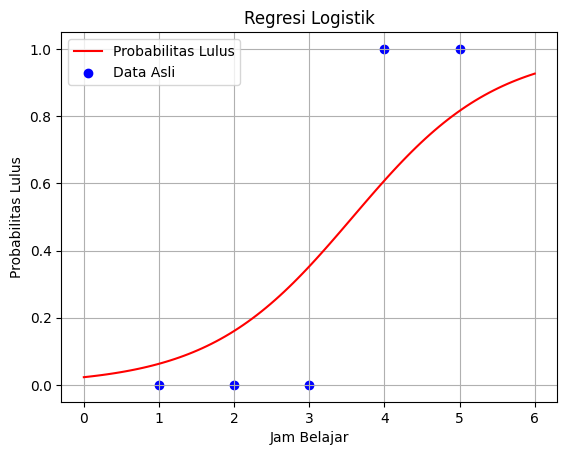

In [20]:
# visualisasi
plt.plot(x_test, y_prob, color='red', label='Probabilitas Lulus')
plt.scatter(jam_belajar, lulus, color='blue', label='Data Asli')
plt.xlabel('Jam Belajar')
plt.ylabel('Probabilitas Lulus')
plt.title('Regresi Logistik')
plt.legend()
plt.grid()
plt.show()

In [22]:
# prediksi data baru
data_baru = np.array([3]).reshape(-1,1) # jam belajar 3 jam
pred = model.predict(data_baru)
pred

#atau bisa pakai
# pred = model.predict([[3]])
# pred

print("apakah siswa yang belajar 3 jam akan lulus?")
if pred[0] == 1:        
    print("Ya, lulus.")
else:
    print("Tidak")

apakah siswa yang belajar 3 jam akan lulus?
Tidak
